In [1]:
!pip install arch hmmlearn

In [2]:
!pip install statsmodels

In [3]:
%pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [4]:
!pip install arch

In [5]:
# Importing packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from arch import arch_model
import pymsm as msm
import seaborn as sns
from sklearn.model_selection import train_test_split

### EDA #

In [6]:
# Load Treasury Bill Rates Data
data = pd.read_csv('T_Bills.csv', parse_dates=['Date'], index_col='Date')

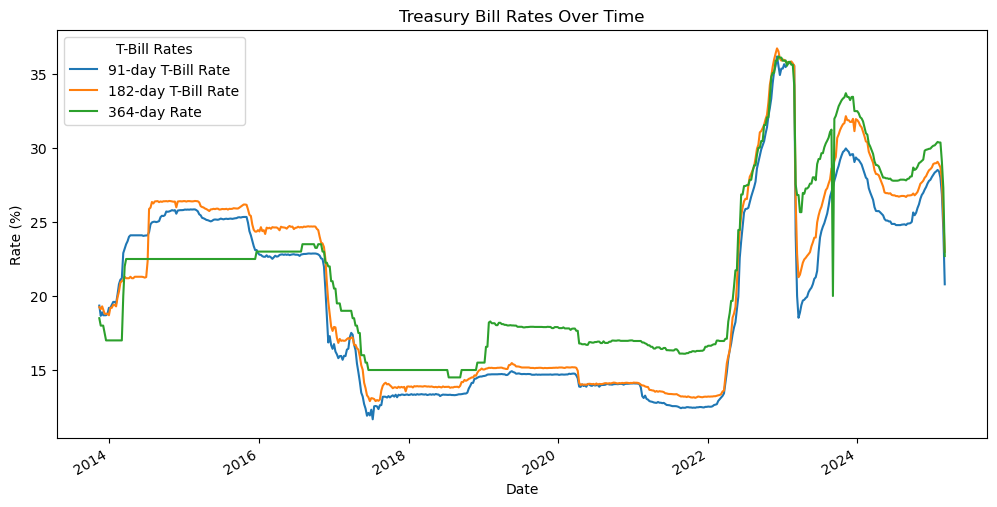

In [7]:
# Converting the data from percentage to whole numnbers
data =data*100

#Plotting the data
data.plot(figsize=(12, 6))
plt.title('Treasury Bill Rates Over Time')
plt.xlabel('Date')
plt.ylabel('Rate (%)')
plt.legend(title='T-Bill Rates')
plt.show()

In [8]:
# Cleaning and Confirmation

data.isna().sum()

91-day T-Bill Rate     0
182-day T-Bill Rate    0
364-day Rate           0
dtype: int64

In [9]:
data.columns

Index(['91-day T-Bill Rate', '182-day T-Bill Rate', '364-day Rate'], dtype='object')

In [10]:
# Renaming columns
data.rename(columns={'91-day T-Bill Rate':'3_months','182-day T-Bill Rate': '6_months', '364-day Rate': '1_year' }, inplace=True)

In [11]:
data.tail()

,3_months,6_months,1_year
Date,,,
2025-02-03,28.4129,28.8984,30.3703
2025-02-10,27.9849,28.6856,30.3700
2025-02-17,26.8591,27.8057,29.0745
2025-02-24,24.4786,25.3874,27.2996
2025-03-03,20.7906,22.9851,22.6994


In [12]:
data.index

DatetimeIndex(['2013-11-13', '2013-11-20', '2013-11-27', '2013-12-02',
               '2013-12-09', '2013-12-16', '2013-12-23', '2013-12-30',
               '2014-01-06', '2014-01-13',
               ...
               '2024-12-30', '2025-01-06', '2025-01-13', '2025-01-20',
               '2025-01-27', '2025-02-03', '2025-02-10', '2025-02-17',
               '2025-02-24', '2025-03-03'],
              dtype='datetime64[ns]', name='Date', length=591, freq=None)

In [13]:
# Ensure columns are renamed correctly
data.rename(columns={'91-day T-Bill Rate':'3_months','182-day T-Bill Rate': '6_months', '364-day Rate': '1_year' }, inplace=True)

# Compute returns
returns_3_months = data['3_months'].pct_change().dropna()
returns_6_months = data['6_months'].pct_change().dropna()
returns_1_year = data['1_year'].pct_change().dropna()

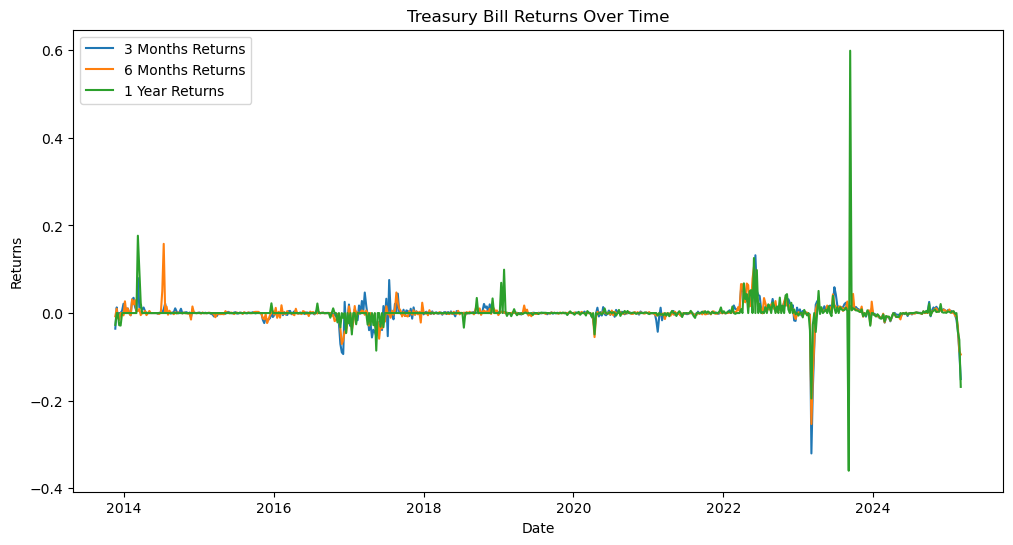

In [14]:
plt.figure(figsize=(12, 6))
plt.plot(returns_3_months, label='3 Months Returns')
plt.plot(returns_6_months, label='6 Months Returns')
plt.plot(returns_1_year, label='1 Year Returns')
plt.title('Treasury Bill Returns Over Time')
plt.xlabel('Date')
plt.ylabel('Returns')
plt.legend()
plt.show()

### Markov Switching Model ###

In [15]:
from statsmodels.tsa.regime_switching.markov_regression import MarkovRegression

c:\Users\reflectorm\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


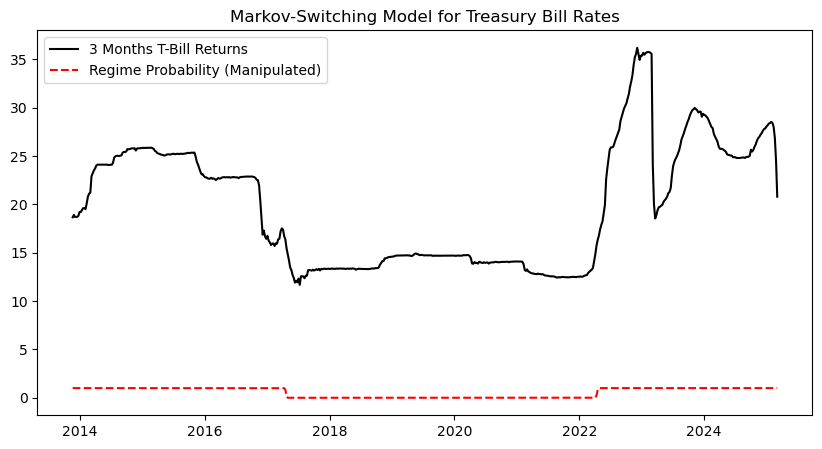

In [16]:
# Fit Markov-Switching Model with 2 regimes (Normal vs. Manipulated)
msm_model = MarkovRegression(data['3_months'], k_regimes=2, trend='c', switching_variance=True)
msm_result = msm_model.fit()

# Extract regime probabilities
regime_probs = msm_result.smoothed_marginal_probabilities[1]  # Probabilities of the manipulated regime

# Ensure both series have the same length
data_trimmed = data['3_months'][1:]
regime_probs_trimmed = regime_probs[1:]

# Plot results
plt.figure(figsize=(10,5))
plt.plot(data_trimmed.index, data_trimmed, label="3 Months T-Bill Returns", color='black')
plt.plot(data_trimmed.index, regime_probs_trimmed, label="Regime Probability (Manipulated)", linestyle='dashed', color='red')
plt.legend()
plt.title("Markov-Switching Model for Treasury Bill Rates")
plt.show()


c:\Users\reflectorm\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


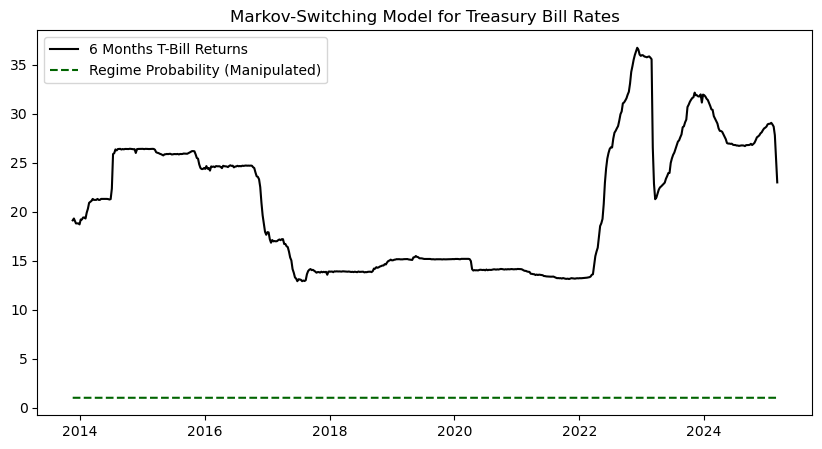

In [17]:
# Fit Markov-Switching Model with 2 regimes (Normal vs. Manipulated)
msm_model = MarkovRegression(data['6_months'], k_regimes=2, trend='c', switching_variance=True)
msm_result = msm_model.fit()

# Extract regime probabilities
regime_probs = msm_result.smoothed_marginal_probabilities[1]  # Probabilities of the manipulated regime

# Ensure both series have the same length
data_trimmed = data['6_months'][1:]
regime_probs_trimmed = regime_probs[1:]

# Plot results
plt.figure(figsize=(10,5))
plt.plot(data_trimmed.index, data_trimmed, label="6 Months T-Bill Returns", color='black')
plt.plot(data_trimmed.index, regime_probs_trimmed, label="Regime Probability (Manipulated)", linestyle='dashed', color='darkgreen')
plt.legend()
plt.title("Markov-Switching Model for Treasury Bill Rates")
plt.show()


c:\Users\reflectorm\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\reflectorm\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\regime_switching\markov_regression.py:191: RuntimeWarning: divide by zero encountered in divide
  -0.5 * resid**2 / variance - 0.5 * np.log(2 * np.pi * variance))
c:\Users\reflectorm\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\regime_switching\markov_regression.py:191: RuntimeWarning: invalid value encountered in divide
  -0.5 * resid**2 / variance - 0.5 * np.log(2 * np.pi * variance))
c:\Users\reflectorm\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\regime_switching\markov_regression.py:191: RuntimeWarning: divide by zero encountered in log
  -0.5 * resid**2 / variance - 0.5 * np.log(2 * np.pi * variance))
c:\Users\

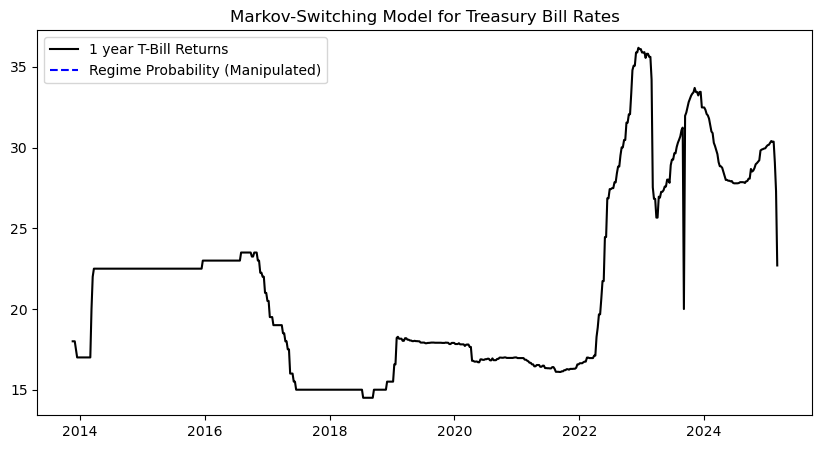

In [18]:
# Fit Markov-Switching Model with 2 regimes (Normal vs. Manipulated)
msm_model = MarkovRegression(data['1_year'], k_regimes=2, trend='c', switching_variance=True)
msm_result = msm_model.fit()

# Extract regime probabilities
regime_probs = msm_result.smoothed_marginal_probabilities[1]  # Probabilities of the manipulated regime

# Ensure both series have the same length
data_trimmed = data['1_year'][1:]
regime_probs_trimmed = regime_probs[1:]

# Plot results
plt.figure(figsize=(10,5))
plt.plot(data_trimmed.index, data_trimmed, label="1 year T-Bill Returns", color='black')
plt.plot(data_trimmed.index, regime_probs_trimmed, label="Regime Probability (Manipulated)", linestyle='dashed', color='blue')
plt.legend()
plt.title("Markov-Switching Model for Treasury Bill Rates")
plt.show()


We observe that there has been manipulation in the in the 91 days for the number of 

In [19]:
# Fit a GARCH(1,1) Model
garch_model = arch_model(data['3_months'], vol='Garch', p=1, q=1, dist='t')
garch_result = garch_model.fit(disp="off")


In [20]:
# Extract volatility estimates
volatility = garch_result.conditional_volatility

In [21]:
from statsmodels.tsa.regime_switching.markov_regression import MarkovRegression

# Example: Two-state Markov switching model
msm_model = MarkovRegression(volatility, k_regimes=2, trend="c")
msm_results = msm_model.fit()
print(msm_results.summary())

                        Markov Switching Model Results                        
Dep. Variable:               cond_vol   No. Observations:                  591
Model:               MarkovRegression   Log Likelihood               -1097.517
Date:                Tue, 11 Mar 2025   AIC                           2205.033
Time:                        12:42:58   BIC                           2226.943
Sample:                             0   HQIC                          2213.568
                                - 591                                         
Covariance Type:               approx                                         
                             Regime 0 parameters                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.0743      0.089     23.183      0.000       1.899       2.250
                             Regime 1 parameters    

c:\Users\reflectorm\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [22]:
msm_results = msm_model.fit()
regime_probs = msm_results.smoothed_marginal_probabilities
print(regime_probs)

                   0             1
Date                              
2013-11-13  1.000000  2.655809e-09
2013-11-20  1.000000  1.512332e-07
2013-11-27  0.999994  6.075490e-06
2013-12-02  0.999992  7.958611e-06
2013-12-09  0.999985  1.546612e-05
...              ...           ...
2025-02-03  1.000000  7.650073e-10
2025-02-10  1.000000  6.131393e-10
2025-02-17  1.000000  1.633656e-10
2025-02-24  1.000000  4.935858e-12
2025-03-03  1.000000  5.672355e-12

[591 rows x 2 columns]


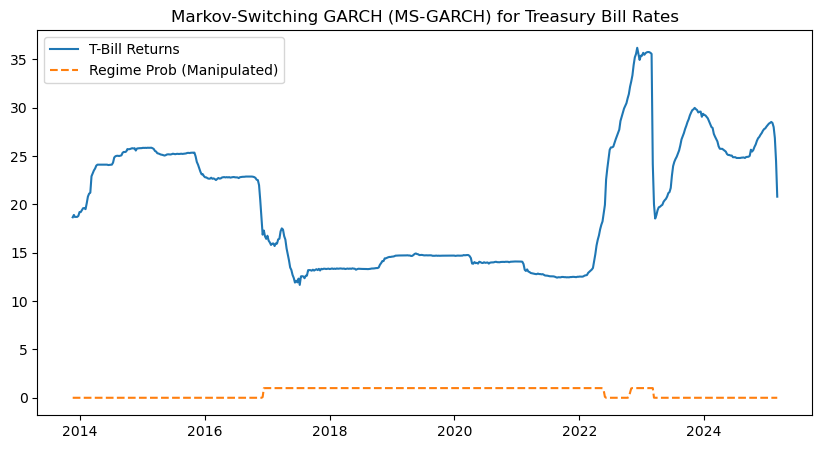

In [23]:
# Ensure both series have the same length
data_trimmed = data['3_months'][1:]
regime_probs_trimmed = regime_probs[1:]

# Plot results
plt.figure(figsize=(10,5))
plt.plot(data_trimmed.index, data_trimmed, label="T-Bill Returns")
plt.plot(data_trimmed.index, regime_probs_trimmed.iloc[:, 1], label="Regime Prob (Manipulated)", linestyle='dashed')
plt.legend()
plt.title("Markov-Switching GARCH (MS-GARCH) for Treasury Bill Rates")
plt.show()

### Forecasting results

1. Nelson-Siegel & Svenssson Model for forecasting

In [24]:
from sklearn.metrics import mean_squared_error, r2_score
import xgboost as xgb

In [25]:
%pip install xgboost
import xgboost as xgb
print(xgb.__version__)  # Should print the installed version


Note: you may need to restart the kernel to use updated packages.
2.1.4


In [26]:
import xgboost as xbg

In [27]:
# Create lagged features
data["91d_TBill_Lag1"] = data['3_months'].shift(1)
data["91d_TBill_Lag2"] = data['3_months'].shift(2)
data["91d_TBill_Lag3"] = data['3_months'].shift(3)
data = data.dropna()

In [28]:
# Define features (X) and target (y)
X = data[["91d_TBill_Lag1", "91d_TBill_Lag2", "91d_TBill_Lag3"]]
y = data['3_months']

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

In [29]:
# Train XGBoost model
xgb_model = xgb.XGBRegressor(objective="reg:squarederror", n_estimators=100, learning_rate=0.1, max_depth=3)
xgb_model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [30]:
# Predict on test set
y_pred = xgb_model.predict(X_test)

In [31]:
# Evaluate performance
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

print("RMSE:", rmse)
print("R² Score:", r2)

RMSE: 1.2770227520648743
R² Score: 0.9039903594408575


c:\Users\reflectorm\AppData\Local\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


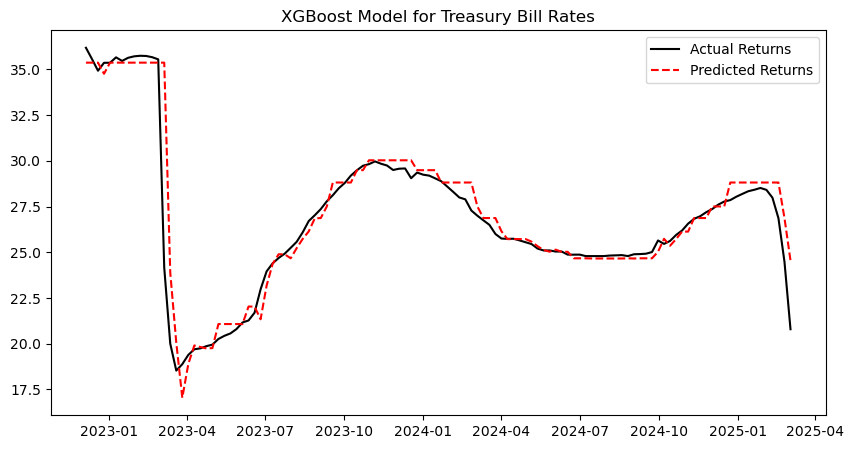

In [32]:
# Plot results
plt.figure(figsize=(10,5)) 
plt.plot(y_test.index, y_test, label="Actual Returns", color='black')
plt.plot(y_test.index, y_pred, label="Predicted Returns", linestyle='dashed', color='red')
plt.legend()
plt.title("XGBoost Model for Treasury Bill Rates") 
plt.show()

In [40]:
data.rename(columns={'91-day T-Bill Rate':'3_months','182-day T-Bill Rate': '6_months', '364-day Rate': '1_year' }, inplace=True)

In [ ]:

# Print the columns to check if 'Date' exists
print("Columns in the DataFrame:", data.columns)
# Print the first few rows to inspect the structure
print(data.head())

# Ensure "Date" is properly formatted and not an index
if isinstance(data.index, pd.DatetimeIndex):  
    data = data.reset_index()  

# If "level_0" column exists, drop it
if "level_0" in data.columns:
    data = data.drop(columns=["level_0"])

# Ensure "Date" column is in datetime format
if 'Date' in data.columns:
    data["Date"] = pd.to_datetime(data["Date"])
else:
    raise KeyError("The 'Date' column is not found in the DataFrame.")

# Get the last available date in the dataset
last_date = data["Date"].max()

# Generate future dates until December 31, 2025
future_dates = pd.date_range(start=last_date + pd.Timedelta(days=7), end="2025-12-31", freq="W")

# Convert future dates to DataFrame
future_df = pd.DataFrame({"Date": future_dates})

print(future_df.head())  # Check the first few dates

Columns in the DataFrame: Index(['Date', '3_months', '6_months', '1_year'], dtype='object')
        Date  3_months  6_months  1_year
0 2013-11-13    0.1935    0.1925   0.185
1 2013-11-20    0.1866    0.1911   0.180
2 2013-11-27    0.1890    0.1930   0.180
3 2013-02-12    0.1870    0.1910   0.180
4 2013-09-12    0.1870    0.1880   0.175
        Date
0 2025-10-12
1 2025-10-19
2 2025-10-26
3 2025-11-02
4 2025-11-09


In [44]:
future_df.tail()

,Date
7,2025-11-30
8,2025-12-07
9,2025-12-14
10,2025-12-21
11,2025-12-28


In [45]:
# Use the last known values for lagged features
last_known_values = data.iloc[-3:][['3_months']].values.flatten().tolist()

# Predict iteratively until end of 2025
predictions = []
for _ in range(len(future_df)):
    # Create input features using last known values
    input_features = pd.DataFrame([last_known_values], columns=["91d_TBill_Lag1", "91d_TBill_Lag2", "91d_TBill_Lag3"])
    
    # Predict next T-bill rate
    predicted_value = xgb_model.predict(input_features)[0]
    
    # Store prediction
    predictions.append(predicted_value)
    
    # Update last known values (shift window forward)
    last_known_values = [last_known_values[1], last_known_values[2], predicted_value]

# Store predictions in the DataFrame
future_df["Predicted 91-day T-Bill Rate"] = predictions

# Append predictions to original dataset
df_forecast = pd.concat([data[['Date', '3_months']], future_df], ignore_index=True)

# Save the forecast to CSV
df_forecast.to_csv("TBill_2025_Predictions.csv", index=False)

# Display forecasted rates for 2025
print(df_forecast.tail(10))


          Date  3_months  Predicted 91-day T-Bill Rate
593 2025-10-26       NaN                     12.016401
594 2025-11-02       NaN                     12.016401
595 2025-11-09       NaN                     12.016401
596 2025-11-16       NaN                     12.016401
597 2025-11-23       NaN                     12.016401
598 2025-11-30       NaN                     12.016401
599 2025-12-07       NaN                     12.016401
600 2025-12-14       NaN                     12.016401
601 2025-12-21       NaN                     12.016401
602 2025-12-28       NaN                     12.016401


The XGBoost model sees that, the end of year 91_days rate to be at 12.02%

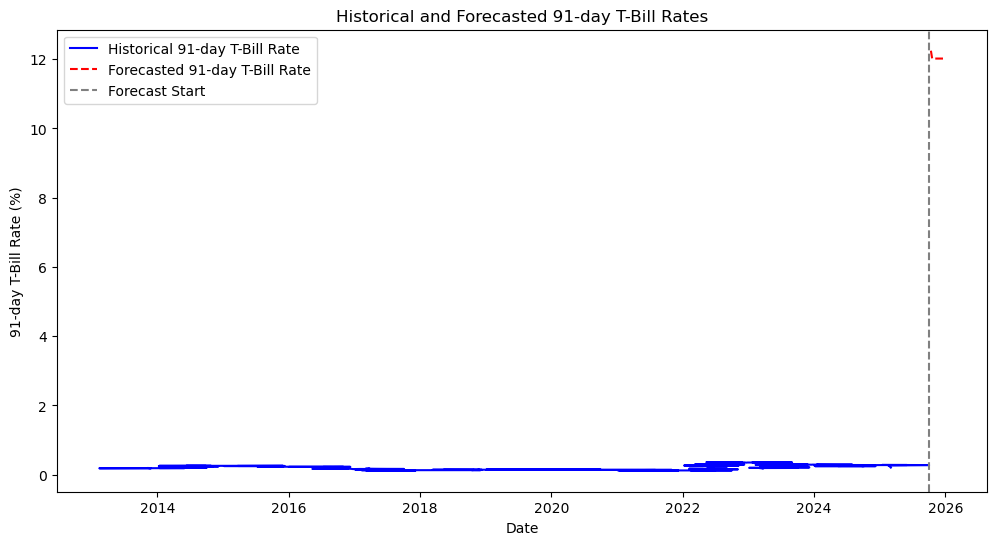

In [46]:
# Plot historical and forecasted 91-day T-Bill rates
plt.figure(figsize=(12, 6))
plt.plot(df_forecast['Date'], df_forecast['3_months'], label='Historical 91-day T-Bill Rate', color='blue')
plt.plot(df_forecast['Date'], df_forecast['Predicted 91-day T-Bill Rate'], label='Forecasted 91-day T-Bill Rate', color='red', linestyle='dashed')
plt.axvline(x=last_date, color='gray', linestyle='--', label='Forecast Start')
plt.title('Historical and Forecasted 91-day T-Bill Rates')
plt.xlabel('Date')
plt.ylabel('91-day T-Bill Rate (%)')
plt.legend()
plt.show()

In [47]:
# Merge historical and forecasted data
merged_df1 = pd.concat([data[['Date', '3_months']], future_df[['Date', 'Predicted 91-day T-Bill Rate']]], ignore_index=True)

# Export to Excel file
merged_df1.to_excel("Historical_and_Forecasted_TBill_Rates.xlsx", index=False)

# Display the merged DataFrame
print(merged_df1.tail(10))

          Date  3_months  Predicted 91-day T-Bill Rate
593 2025-10-26       NaN                     12.016401
594 2025-11-02       NaN                     12.016401
595 2025-11-09       NaN                     12.016401
596 2025-11-16       NaN                     12.016401
597 2025-11-23       NaN                     12.016401
598 2025-11-30       NaN                     12.016401
599 2025-12-07       NaN                     12.016401
600 2025-12-14       NaN                     12.016401
601 2025-12-21       NaN                     12.016401
602 2025-12-28       NaN                     12.016401


#### 182_days modeling

In [48]:
# Create lagged features
data["182d_TBill_Lag1"] = data['6_months'].shift(1)
data["182d_TBill_Lag2"] = data['6_months'].shift(2)
data["182d_TBill_Lag3"] = data['6_months'].shift(3)
data = data.dropna()

In [49]:
# Define features (X) and target (y)
X = data[["182d_TBill_Lag1", "182d_TBill_Lag2", "182d_TBill_Lag3"]]
y = data['6_months']

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

In [50]:
# Train XGBoost model
xgb_model2 = xgb.XGBRegressor(objective="reg:squarederror", n_estimators=100, learning_rate=0.1, max_depth=3)
xgb_model2.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [51]:
# Predict on test set
y_pred = xgb_model2.predict(X_test)

In [52]:
# Evaluate performance
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

print("RMSE:", rmse)
print("R² Score:", r2)

RMSE: 0.01180024405221324
R² Score: 0.8949601649747426


c:\Users\reflectorm\AppData\Local\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


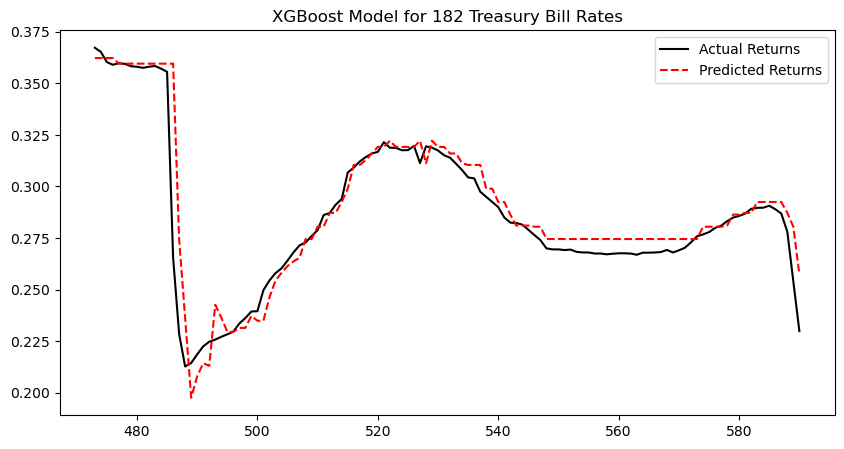

In [53]:
# Plot results
plt.figure(figsize=(10,5)) 
plt.plot(y_test.index, y_test, label="Actual Returns", color='black')
plt.plot(y_test.index, y_pred, label="Predicted Returns", linestyle='dashed', color='red')
plt.legend()
plt.title("XGBoost Model for 182 Treasury Bill Rates") 
plt.show()

In [54]:
new_data2 = pd.read_csv('T_Bills.csv')

In [56]:
# Generate future dates until December 31, 2025 for 182-day T-Bill Rate
future_dates2 = pd.date_range(start=last_date + pd.Timedelta(days=7), end="2025-12-31", freq="W")

# Convert future dates to DataFrame
future_df2 = pd.DataFrame({"Date": future_dates2})

# Use the last known values for lagged features
last_known_values = data.iloc[-3:][['6_months']].values.flatten().tolist()

# Predict iteratively until end of 2025
predictions = []
for _ in range(len(future_df2)):
    # Create input features using last known values
    input_features = pd.DataFrame([last_known_values], columns=["182d_TBill_Lag1", "182d_TBill_Lag2", "182d_TBill_Lag3"])
    
    # Predict next T-bill rate
    predicted_value = xgb_model2.predict(input_features)[0]
    
    # Store prediction
    predictions.append(predicted_value)
    
    # Update last known values (shift window forward)
    last_known_values = [last_known_values[1], last_known_values[2], predicted_value]

# Store predictions in the DataFrame
future_df2["Predicted 182-day T-Bill Rate"] = predictions

# Append predictions to original dataset
df_forecast2 = pd.concat([data[['Date', '6_months']], future_df2], ignore_index=True)

# Save the forecast to CSV
df_forecast2.to_csv("TBill_2025_Predictions.csv", index=False)

# Display forecasted rates for 2025
print(df_forecast2.tail(10))


          Date  6_months  Predicted 182-day T-Bill Rate
590 2025-10-26       NaN                       0.240262
591 2025-11-02       NaN                       0.266240
592 2025-11-09       NaN                       0.245029
593 2025-11-16       NaN                       0.247656
594 2025-11-23       NaN                       0.265523
595 2025-11-30       NaN                       0.244137
596 2025-12-07       NaN                       0.258013
597 2025-12-14       NaN                       0.265075
598 2025-12-21       NaN                       0.244137
599 2025-12-28       NaN                       0.259445


In [58]:
# Merge historical and forecasted data
merged_df2 = pd.concat([data[['Date', '6_months']], future_df2[['Date', 'Predicted 182-day T-Bill Rate']]], ignore_index=True)

# Export to Excel file
merged_df2.to_excel("Historical_and_Forecasted_TBill_Rates2.xlsx", index=False)

# Display the merged DataFrame
print(merged_df2.tail(10))

          Date  6_months  Predicted 182-day T-Bill Rate
590 2025-10-26       NaN                       0.240262
591 2025-11-02       NaN                       0.266240
592 2025-11-09       NaN                       0.245029
593 2025-11-16       NaN                       0.247656
594 2025-11-23       NaN                       0.265523
595 2025-11-30       NaN                       0.244137
596 2025-12-07       NaN                       0.258013
597 2025-12-14       NaN                       0.265075
598 2025-12-21       NaN                       0.244137
599 2025-12-28       NaN                       0.259445


#### 364_days forecasting

In [59]:
# Create lagged features
data["364d_TBill_Lag1"] = data['1_year'].shift(1)
data["364d_TBill_Lag2"] = data['1_year'].shift(2)
data["364d_TBill_Lag3"] = data['1_year'].shift(3)
data = data.dropna()

C:\Users\reflectorm\AppData\Local\Temp\ipykernel_21632\2873784671.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["364d_TBill_Lag1"] = data['1_year'].shift(1)
C:\Users\reflectorm\AppData\Local\Temp\ipykernel_21632\2873784671.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["364d_TBill_Lag2"] = data['1_year'].shift(2)
C:\Users\reflectorm\AppData\Local\Temp\ipykernel_21632\2873784671.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .l

In [60]:
# Define features (X) and target (y)
X = data[["364d_TBill_Lag1", "364d_TBill_Lag2", "364d_TBill_Lag3"]]
y = data['1_year']

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

In [64]:
# Train XGBoost model
xgb_model3 = xgb.XGBRegressor(objective="reg:squarederror", n_estimators=100, learning_rate=0.1, max_depth=4)
xgb_model3.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=4, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [65]:
# Predict on test set
y_pred = xgb_model3.predict(X_test)

In [66]:
# Evaluate performance
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

print("RMSE:", rmse)
print("R² Score:", r2)

RMSE: 0.018375389723071008
R² Score: 0.598734016957639


c:\Users\reflectorm\AppData\Local\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [68]:
!pip install optuna

Using cached optuna-4.2.1-py3-none-any.whl (383 kB)
  Attempting uninstall: typing-extensions
    Found existing installation: typing_extensions 4.11.0
    Uninstalling typing_extensions-4.11.0:
      Successfully uninstalled typing_extensions-4.11.0


In [69]:
import optuna

In [71]:
import optuna

# Define the objective function
def objective(trial):
    params = {
        "n_estimators": trial.suggest_int("n_estimators", 50, 200),
        "learning_rate": trial.suggest_float("learning_rate", 0.01, 0.3),
        "max_depth": trial.suggest_int("max_depth", 3, 10),
        "min_child_weight": trial.suggest_int("min_child_weight", 1, 10),
        "gamma": trial.suggest_float("gamma", 0.0, 0.5),
        "subsample": trial.suggest_float("subsample", 0.5, 1.0),
        "colsample_bytree": trial.suggest_float("colsample_bytree", 0.5, 1.0),
    }

    # Re-train the model
    model = xgb.XGBRegressor(**params, random_state=42)
    model.fit(X_train, y_train)

    # Evaluate model
    y_pred = model.predict(X_test)
    rmse = mean_squared_error(y_test, y_pred, squared=False)  # RMSE score

    return rmse  # Optuna will minimize this

# Run the optimization
study = optuna.create_study(direction="minimize")
study.optimize(objective, n_trials=50)  # Run 50 trials

# Best parameters
print("Best Parameters:", study.best_params)

[I 2025-03-11 13:21:59,420] A new study created in memory with name: no-name-f54e08e6-fde5-4500-b5b4-c9560564f739
c:\Users\reflectorm\AppData\Local\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
[I 2025-03-11 13:21:59,541] Trial 0 finished with value: 0.07440190574717684 and parameters: {'n_estimators': 174, 'learning_rate': 0.2301367661842263, 'max_depth': 9, 'min_child_weight': 10, 'gamma': 0.21142709341043064, 'subsample': 0.762358917894993, 'colsample_bytree': 0.57004023644216}. Best is trial 0 with value: 0.07440190574717684.
c:\Users\reflectorm\AppData\Local\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error

Best Parameters: {'n_estimators': 140, 'learning_rate': 0.25498476419110394, 'max_depth': 7, 'min_child_weight': 6, 'gamma': 0.0002717528747152847, 'subsample': 0.5576854402956704, 'colsample_bytree': 0.9331086540490364}


In [72]:
# Train final model with best hyperparameters
best_params = study.best_params
final_model = xgb.XGBRegressor(**best_params, random_state=42)
final_model.fit(X_train, y_train)

# Evaluate the final model
y_final_pred = final_model.predict(X_test)
final_rmse = mean_squared_error(y_test, y_final_pred, squared=False)

print(f"Final RMSE: {final_rmse}")


Final RMSE: 0.01879903030494846


c:\Users\reflectorm\AppData\Local\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


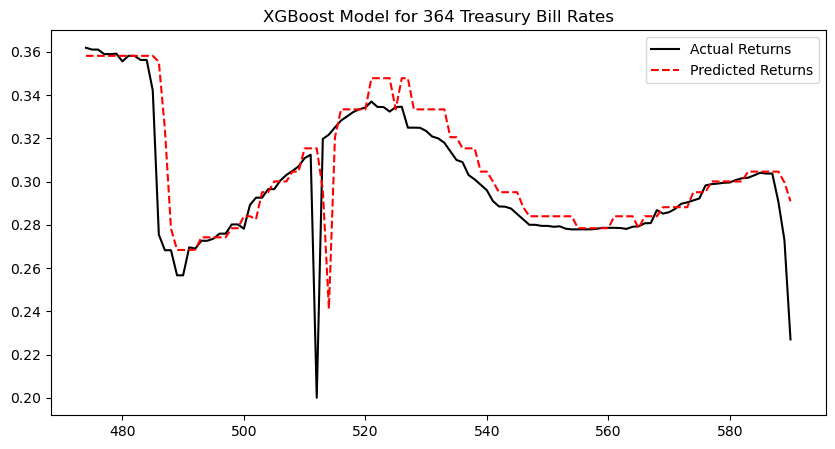

In [73]:
# Plot results
plt.figure(figsize=(10,5)) 
plt.plot(y_test.index, y_test, label="Actual Returns", color='black')
plt.plot(y_test.index, y_pred, label="Predicted Returns", linestyle='dashed', color='red')
plt.legend()
plt.title("XGBoost Model for 364 Treasury Bill Rates") 
plt.show()

In [ ]:
new_data3 = pd.read_csv('T_Bills.csv')

In [74]:
# Generate future dates until December 31, 2025 for 364-day T-Bill Rate
future_dates3 = pd.date_range(start=last_date + pd.Timedelta(days=7), end="2025-12-31", freq="W")

# Convert future dates to DataFrame
future_df3 = pd.DataFrame({"Date": future_dates3})

# Use the last known values for lagged features
last_known_values = data.iloc[-3:][['1_year']].values.flatten().tolist()

# Predict iteratively until end of 2025
predictions = []
for _ in range(len(future_df3)):
    # Create input features using last known values
    input_features = pd.DataFrame([last_known_values], columns=["364d_TBill_Lag1", "364d_TBill_Lag2", "364d_TBill_Lag3"])
    
    # Predict next T-bill rate
    predicted_value = xgb_model3.predict(input_features)[0]
    
    # Store prediction
    predictions.append(predicted_value)
    
    # Update last known values (shift window forward)
    last_known_values = [last_known_values[1], last_known_values[2], predicted_value]

# Store predictions in the DataFrame
future_df3["Predicted 364-day T-Bill Rate"] = predictions

# Append predictions to original dataset
df_forecast3 = pd.concat([data[['Date', '1_year']], future_df3], ignore_index=True)

# Save the forecast to CSV
df_forecast3.to_csv("TBill_2025_Predictions.csv", index=False)

# Display forecasted rates for 2025
print(df_forecast3.tail(10))

          Date  1_year  Predicted 364-day T-Bill Rate
587 2025-10-26     NaN                       0.277468
588 2025-11-02     NaN                       0.244556
589 2025-11-09     NaN                       0.271131
590 2025-11-16     NaN                       0.244556
591 2025-11-23     NaN                       0.263808
592 2025-11-30     NaN                       0.244556
593 2025-12-07     NaN                       0.258107
594 2025-12-14     NaN                       0.244422
595 2025-12-21     NaN                       0.258107
596 2025-12-28     NaN                       0.244422


In [77]:
# Merge historical and forecasted data
merged_df3 = pd.concat([new_data[['Date', '1_year']], future_df3[['Date', 'Predicted 364-day T-Bill Rate']]], ignore_index=True)

# Export to Excel file
merged_df3.to_excel("Historical_and_Forecasted_TBill_Rates3.xlsx", index=False)

# Display the merged DataFrame
print(merged_df3.tail(10))

          Date  1_year  Predicted 364-day T-Bill Rate
593 2025-10-26     NaN                       0.277468
594 2025-11-02     NaN                       0.244556
595 2025-11-09     NaN                       0.271131
596 2025-11-16     NaN                       0.244556
597 2025-11-23     NaN                       0.263808
598 2025-11-30     NaN                       0.244556
599 2025-12-07     NaN                       0.258107
600 2025-12-14     NaN                       0.244422
601 2025-12-21     NaN                       0.258107
602 2025-12-28     NaN                       0.244422


In [78]:
# Merge future data frames
merged_future_data = pd.concat([future_df, future_df2, future_df3], axis=1)

# Save the merged future data to an Excel file
merged_future_data.to_excel("Merged_Future_TBill_Rates.xlsx", index=False)

# Display the merged future data
print(merged_future_data.head())

        Date  Predicted 91-day T-Bill Rate       Date  \
0 2025-10-12                     12.242529 2025-10-12   
1 2025-10-19                     12.016401 2025-10-19   
2 2025-10-26                     12.016401 2025-10-26   
3 2025-11-02                     12.016401 2025-11-02   
4 2025-11-09                     12.016401 2025-11-09   

   Predicted 182-day T-Bill Rate       Date  Predicted 364-day T-Bill Rate  
0                       0.273347 2025-10-12                       0.278507  
1                       0.245951 2025-10-19                       0.242644  
2                       0.240262 2025-10-26                       0.277468  
3                       0.266240 2025-11-02                       0.244556  
4                       0.245029 2025-11-09                       0.271131  


Using XGBoost, we forecasted the 91 days treasury bills to end at 12.02% at the end of 2025.